<a href="https://colab.research.google.com/github/roitraining/PythonML/blob/Development/Ch07-ClassificationAnalysis/07-01-ClassificationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Combine the multiple files into one big CSV since we could not load a large file to GitHub.

In [ ]:
! ./combine.sh

### Read in a set of data and examine it

In [1]:
import pandas as pd
df = pd.read_csv('CreditCardFraud.csv')

print (df.shape, df.columns)
train_size = .3
test_size = .1

print (df.head())
print (df.isFraud.value_counts())
print (df.type.value_counts())


(6362620, 11) Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.

### Keep the columns we want and change the type to code numbers instead

In [2]:
columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']
df = df[columns]
df.type = pd.Categorical(df.type).codes
print (df.shape, df.columns)
print (df.head())


(6362620, 8) Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')
   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud  isFraud  
0             0.0               0        0  
1             0.0               0        0  
2             0.0               0        1  
3             0.0               0        1  
4             0.0               0        0  


### Prepare train & test sets with desired columns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
dfNB = df
trainNB_X, testNB_X, trainNB_Y, testNB_Y = train_test_split(dfNB[dfNB.columns[:-1]], dfNB.isFraud, train_size = train_size, test_size = test_size)
print (testNB_Y.value_counts())
print(trainNB_Y.value_counts()/trainNB_Y.count())
print(testNB_Y.value_counts()/testNB_Y.count())
print (trainNB_X[:10])

0    635433
1       829
Name: isFraud, dtype: int64
0    0.998693
1    0.001307
Name: isFraud, dtype: float64
0    0.998697
1    0.001303
Name: isFraud, dtype: float64
         type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2327414     1  136938.55       18376.00            0.00       105620.28   
1896001     0   59389.36      403899.81       463289.16       204496.15   
3226767     1  588237.18           0.00            0.00      1224002.98   
3898408     1  323341.49      129188.00            0.00            0.00   
5541150     0  112824.80     8679346.72      8792171.52       915599.52   
359735      3    8621.89      507737.38       499115.49            0.00   
1275778     3   30565.79        4062.00            0.00            0.00   
3318416     3    4537.35         802.00            0.00            0.00   
5911080     3    2835.01       40046.00        37210.99            0.00   
3311456     1   77418.25           0.00            0.00       461174.21   

      

## Create a Naive Bayes model

In [4]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(trainNB_X, trainNB_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Examine the results of Naive Bayes

In [8]:
predNB_Y = modelNB.predict(testNB_X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testNB_Y, predNB_Y)
print (cm)

# helper function to print confusion matrix as percentages
def cm_percent(cm, length, legend = True):
    import numpy as np
    if legend:
       print (' PC', 'FP\n', 'FN', 'PW')
    return np.ndarray(shape = (2,2), buffer = np.array([100 *(cm[0][0] + cm[1][1])/length,
       100 * cm[0][1]/length, 100 * cm[1][0]/length, 100 * (cm[1][0] + cm[0][1])/length]))

cmp = cm_percent(cm, len(testNB_Y))
print (cmp)
print (testNB_Y.value_counts())
print (len(testNB_Y))


[[629075   6358]
 [   688    141]]
 PC FP
 FN PW
[[98.89259456  0.99927388]
 [ 0.10813156  1.10740544]]
0    635433
1       829
Name: isFraud, dtype: int64
636262


## Save a trained model

In [9]:
from joblib import dump, load
dump(modelNB, 'modelNB.joblib') 


['modelNB.joblib']

## Load a saved model

In [10]:
modelNB2 = load('modelNB.joblib')
predNB_Y = modelNB2.predict(testNB_X)
cm = confusion_matrix(testNB_Y, predNB_Y)
print (cm)
cmp = cm_percent(cm, len(testNB_Y))
print (cmp)

[[629075   6358]
 [   688    141]]
 PC FP
 FN PW
[[98.89259456  0.99927388]
 [ 0.10813156  1.10740544]]


## Train the Decision Tree model

In [11]:
from sklearn.tree import DecisionTreeClassifier
dfDT = df
trainDT_X, testDT_X, trainDT_Y, testDT_Y = train_test_split(dfDT[dfDT.columns[:-1]], dfDT.isFraud, train_size = train_size, test_size = test_size)

modelDT = DecisionTreeClassifier()
modelDT.fit(trainDT_X, trainDT_Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Examine the results of the Decision Tree

In [13]:
def important_features(model, columns):
    return pd.DataFrame(model.feature_importances_, columns=['Importance'], index = columns).sort_values(['Importance'], ascending = False)
 
predDT_Y = modelDT.predict(testDT_X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testDT_Y, predDT_Y)
print (cm)
print (cm_percent(cm, len(testDT_Y)))
print (testDT_Y.value_counts(), len(testDT_Y))
print (important_features(modelDT, trainDT_X.columns))



[[635345    131]
 [   131    655]]
 PC FP
 FN PW
[[9.99588220e+01 2.05890026e-02]
 [2.05890026e-02 4.11780053e-02]]
0    635476
1       786
Name: isFraud, dtype: int64 636262
                Importance
oldbalanceOrg     0.370316
newbalanceDest    0.326360
amount            0.156908
oldbalanceDest    0.095893
newbalanceOrig    0.034789
type              0.015734
isFlaggedFraud    0.000000


## Prepare the data
### Logistic Regression requires categorical data be dummy encoded

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
def dummy_code(data, columns, drop_first = True):
    for c in columns:
        dummies = pd.get_dummies(data[c], prefix = c, drop_first = drop_first)
        i = list(data.columns).index(c)
        data = pd.concat([data.iloc[:,:i], dummies, data.iloc[:,i+1:]], axis = 1)
    return data

dfLR = dummy_code(df, ['type'], drop_first = True)
trainLR_X, testLR_X, trainLR_Y, testLR_Y = train_test_split(dfLR.iloc[:,dfLR.columns != 'isFraud'], dfLR.isFraud, train_size = train_size, test_size = test_size)

print (testLR_X.columns)
print (testLR_X.head())


Index(['type_1', 'type_2', 'type_3', 'type_4', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')
         type_1  type_2  type_3  type_4     amount  oldbalanceOrg  \
4546386       1       0       0       0   60346.15        14571.0   
2280455       0       0       1       0   10521.02        22122.0   
2663654       1       0       0       0   20258.00        11291.0   
4128164       1       0       0       0   62313.19        53388.0   
5631664       1       0       0       0  104905.07            0.0   

         newbalanceOrig  oldbalanceDest  newbalanceDest  isFlaggedFraud  
4546386            0.00      4555931.19      4616277.34               0  
2280455        11600.98            0.00            0.00               0  
2663654            0.00            0.00        20258.00               0  
4128164            0.00            0.00        62313.19               0  
5631664            0.00      7325877.82

## Create a Logistic Regression model

In [15]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class='auto', solver='lbfgs')
modelLR.fit(trainLR_X, trainLR_Y)
print(modelLR.coef_)

[[-2.81392131e-08 -2.30118401e-09 -3.95224200e-07 -1.00092908e-09
  -9.68265456e-04  9.73410542e-04 -1.04630614e-03  1.64908602e-06
  -3.59127043e-06  8.80763091e-12]]


## Examine the results of Logistic Regression

0.9972527040747365 0.002747295925263492
[[633865   1576]
 [   172    649]]
 PC FP
 FN PW
[[9.97252704e+01 2.47696704e-01]
 [2.70328890e-02 2.74729593e-01]]


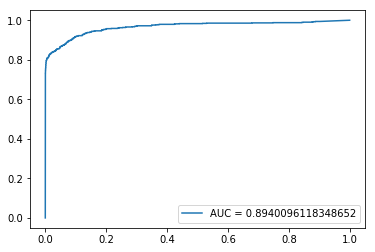

In [18]:
%matplotlib inline
import numpy as np
predLR_Y = modelLR.predict(testLR_X)
from sklearn.metrics import confusion_matrix
score = modelLR.score(testLR_X, testLR_Y)
mse = np.mean((predLR_Y - testLR_Y)**2)
print (score, mse)

cm = confusion_matrix(testLR_Y, predLR_Y)
print (cm)
cmp = cm_percent(cm, len(testLR_Y))
print (cmp)

predLR_Y1 = modelLR.predict_proba(testLR_X)

from sklearn.metrics import roc_auc_score, roc_curve
roc = roc_auc_score(testLR_Y, predLR_Y)
fpr, tpr, x = roc_curve(testLR_Y, predLR_Y1[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc))
plt.legend(loc=4)
plt.show()

#import scikitplot.metrics as skplt
#import matplotlib.pyplot as plt
#skplt.plot_roc(testY, predY1)
#plt.show()


## Try Logistic Regression with different probability thresholds to change ratio of false negatives and positives

In [24]:
predLR_Y = modelLR.predict_proba(testLR_X)
print (predLR_Y[:10])
print ('Score', modelLR.score(testLR_X, testLR_Y))

for threshold in range(30, 91, 10):
    predLR_Y1 = np.where(predLR_Y[:,0] >= threshold/100, 0, 1)
    mse = np.mean((predLR_Y1 - testLR_Y)**2)
    cm = confusion_matrix(testLR_Y, predLR_Y1)
    print ('\nTHRESHOLD', threshold, 'MSE', mse)
    print (cm)
    print (cm_percent(cm, len(testLR_Y), legend = False))


[[1.00000000e+000 7.02402543e-024]
 [6.88159690e-001 3.11840310e-001]
 [9.99832958e-001 1.67042439e-004]
 [9.99814274e-001 1.85726193e-004]
 [1.00000000e+000 3.49361046e-051]
 [9.42716681e-001 5.72833189e-002]
 [1.00000000e+000 8.83277726e-131]
 [6.80630022e-001 3.19369978e-001]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 6.94775521e-072]]
Score 0.9972527040747365

THRESHOLD 30 MSE 0.0006255284772625114
[[635439      2]
 [   396    425]]
[[9.99374472e+01 3.14335918e-04]
 [6.22385118e-02 6.25528477e-02]]

THRESHOLD 40 MSE 0.0005202259446580183
[[635427     14]
 [   317    504]]
[[9.99479774e+01 2.20035143e-03]
 [4.98222430e-02 5.20225945e-02]]

THRESHOLD 50 MSE 0.002747295925263492
[[633865   1576]
 [   172    649]]
[[9.97252704e+01 2.47696704e-01]
 [2.70328890e-02 2.74729593e-01]]

THRESHOLD 60 MSE 0.02395868368690885
[[620329  15112]
 [   132    689]]
[[9.76041316e+01 2.37512220e+00]
 [2.07461706e-02 2.39586837e+00]]

THRESHOLD 70 MSE 0.045990488195114594
[[606297  29144]
 [ 

## Prepare the data for a Neural Network
### This time you should not drop the first column when dummy encoding. Additionally, data works better if it is rescaled.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
# rescale the data
dfNN = dummy_code(df, ['type'], drop_first = False)
print (dfNN.columns)
dfNN[['amount',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] /= dfNN[['amount',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()
trainNN_X, testNN_X, trainNN_Y, testNN_Y = train_test_split(dfNN.iloc[:,dfNN.columns != 'isFraud'], dfNN.isFraud, train_size = train_size, test_size = test_size)



Index(['type_0', 'type_1', 'type_2', 'type_3', 'type_4', 'amount',
       'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'isFraud'],
      dtype='object')


## Create a Neural Network model

In [26]:
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes = (5, 3, 2), activation = 'logistic')
modelNN.fit(trainNN_X, trainNN_Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Examine the results of Neural Network predictions

In [27]:
predNN_Y = modelNN.predict(testNN_X)
cm = confusion_matrix(testNN_Y, predNN_Y)
print (cm)
cmp = cm_percent(cm, len(testNN_Y))
print (cmp)


[[635388     34]
 [   536    304]]
 PC FP
 FN PW
[[9.99104143e+01 5.34371061e-03]
 [8.42420261e-02 8.95857367e-02]]


## Create a SVM model

In [28]:
from sklearn import svm
train_size = .03
test_size = .01
dfSVM = dfNN
trainSVM_X, testSVM_X, trainSVM_Y, testSVM_Y = train_test_split(dfSVM.iloc[:,dfSVM.columns != 'isFraud'], dfSVM.isFraud, train_size = train_size, test_size = test_size)

def do_SVM(kernel, gamma):
    print ("\nKernel:", kernel, "Gamma:", gamma)
    modelSVM = svm.SVC(gamma = gamma,  kernel = kernel)
    modelSVM.fit(trainSVM_X, trainSVM_Y)
    print (modelSVM.score(testSVM_X, testSVM_Y))

    predSVM_Y = modelSVM.predict(testSVM_X)
    cm = confusion_matrix(testSVM_Y, predSVM_Y)
    print (cm)

do_SVM('linear', gamma='auto')

for kernel in ['rbf', 'poly', 'sigmoid']:
    for gamma in ['auto', 10, 100]:
        if not (kernel == 'poly' and gamma == 100):
           do_SVM(kernel, gamma)




Kernel: linear Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: rbf Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: rbf Gamma: 10
0.998648372546246
[[63528     0]
 [   86    13]]

Kernel: rbf Gamma: 100
0.9987898219309412
[[63528     0]
 [   77    22]]

Kernel: poly Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: poly Gamma: 10
0.9990570041020321
[[63528     0]
 [   60    39]]

Kernel: sigmoid Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: sigmoid Gamma: 10
0.9979725588193691
[[63498    30]
 [   99     0]]

Kernel: sigmoid Gamma: 100
0.9975167774686847
[[63469    59]
 [   99     0]]


In [43]:
modelSVM = svm.SVC(gamma = 100)
modelSVM.fit(trainSVM_X, trainSVM_Y)
print(modelSVM.score(testSVM_X, testSVM_Y))
predSVM_Y = modelSVM.predict(testSVM_X)
print(confusion_matrix(testSVM_Y, predSVM_Y ))


0.9987898219309412
[[63528     0]
 [   77    22]]


## Ensemble Learning

## Create and train a Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=10)
trainRF_X, trainRF_Y, testRF_X, testRF_Y = trainDT_X, trainDT_Y, testDT_X, testDT_Y
modelRF.fit(trainRF_X, trainRF_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Test the accuracy of the predictions and examine important features

In [34]:
predRF_Y = modelRF.predict(testRF_X)
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(testRF_Y, predRF_Y))
cm = confusion_matrix(testRF_Y, predRF_Y)
print (cm)

import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=trainRF_X.columns).sort_values(ascending=False)
print (feature_imp)

Accuracy: 0.9996227968981332
[[635451     25]
 [   215    571]]
oldbalanceOrg     0.344967
newbalanceDest    0.295017
amount            0.165853
oldbalanceDest    0.076471
type              0.067617
newbalanceOrig    0.050074
isFlaggedFraud    0.000000
dtype: float64


## Visualize important features

No handles with labels found to put in legend.


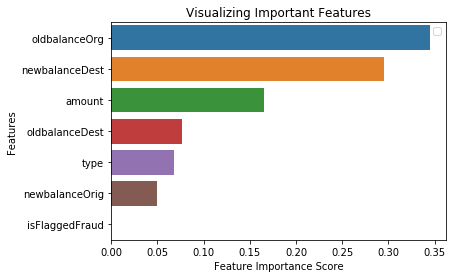

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## Try removing less important features and retrain it

In [36]:
newTrainRF_X = trainRF_X[['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest']]
newTestRF_X = testRF_X[['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest']]
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=10)
modelRF.fit(newTrainRF_X, trainRF_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### In this case the accuracy did not go up, but in many cases it does

In [37]:
newpredRF_Y = modelRF.predict(newTestRF_X)
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(testRF_Y, newpredRF_Y))
cm = confusion_matrix(testRF_Y, newpredRF_Y)
print (cm)

import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=newTrainRF_X.columns).sort_values(ascending=False)
print (feature_imp)

Accuracy: 0.9993383228921419
[[635412     64]
 [   357    429]]
oldbalanceOrg     0.411746
amount            0.366195
newbalanceDest    0.146907
oldbalanceDest    0.075152
dtype: float64


In [40]:
from sklearn.ensemble import VotingClassifier
modelVC = VotingClassifier(estimators=[('dt', modelDT), ('nb', modelNB)], voting='hard')
modelVC.fit(trainDT_X, trainDT_Y)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
      

In [41]:
print(modelVC.score(testDT_X,testDT_Y))

predVC_Y = modelVC.predict(testDT_X)
cm = confusion_matrix(testDT_Y, predVC_Y)
print (cm)

0.9989312578780439
[[635473      3]
 [   677    109]]


In [68]:
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes = (5, 3, 2), activation = 'logistic')
modelNN.fit(trainLR_X, trainLR_Y)

predLR = (modelLR.predict_proba(testLR_X))[:,0]
predNN = (modelNN.predict_proba(testLR_X))[:,0]

predAvg = (predLR + predNN) / 2
predAvg1 = np.where(predAvg >= .7, 0, 1)

print (confusion_matrix(testLR_Y, predAvg1))

[0 0 0 ... 0 0 0]
[[635427     14]
 [   316    505]]


# End of notebook